In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
# features = ["host_compromise_ratio"]

In [4]:
# evaluation = execute_simulation(start_time=0, finish_time=3000, mtd_interval=200, scheme='random', total_nodes=100)
evaluation = execute_ai_simulation(start_time=0, finish_time=None, scheme='random', mtd_interval=None, custom_strategies=None,
                       checkpoints=None, total_nodes=50, total_endpoints=5, total_subnets=8, total_layers=4,
                       target_layer=4, total_database=2, terminate_compromise_ratio=0.8, new_network=False, features=features)

Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: Interrupted EXPLOIT_VULN at 120.1s!
Action: 0
Action: 1
MTD: OSDiversity triggered 201.1s
Action: 1
MTD: CompleteTopologyShuffle triggered 401.3s
MTD: Interrupted EXPLOIT_VULN at 521.6s!
Action: 1
MTD: CompleteTopologyShuffle triggered 601.6s
MTD: Interrupted EXPLOIT_VULN at 722.5s!
Action: 1
MTD: IPShuffle triggered 802.1s
MTD: Interrupted EXPLOIT_VULN at 914.2s!
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 1002.3s
Action: 1
MTD: ServiceDiversity triggered 1202.4s
Action: 1
MTD: ServiceDiversity triggered 1402.5s
Action: 1
MTD: ServiceDiversity triggered 1603.5s
Action: 1
MTD: OSDiversity triggered 1803.7s
Action: 1
MTD: CompleteTopologyShuffle triggered 2004.9s
MTD: Interrupted EXPLOIT_VULN at 2125.0s!
Action: 0
Action: 1
MTD: ServiceDiversity triggered 2205.0s
Action: 1
MTD: ServiceDiversity triggered 2405.1s
Action: 1
MTD: ServiceDiversity triggered 2605.8s
Action: 1
MTD: OSDiversity triggered 2806.8s


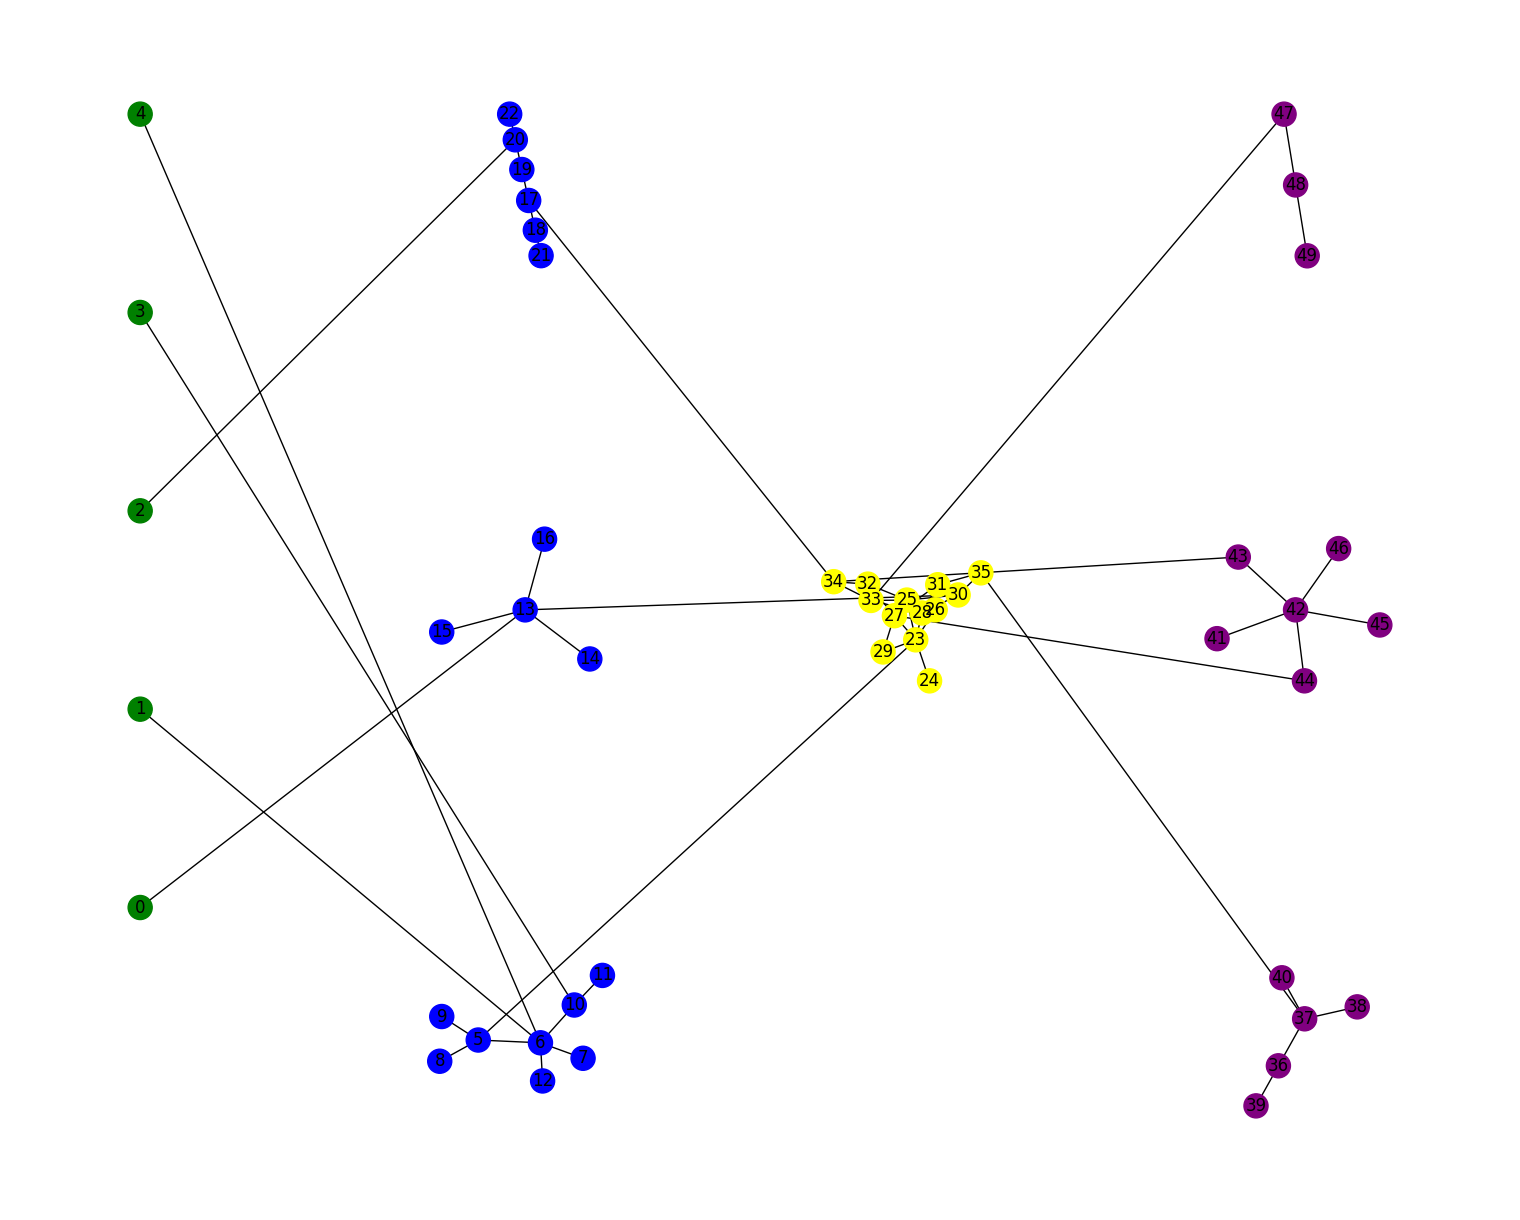

In [ ]:
evaluation.get_network().draw()
plt.show()

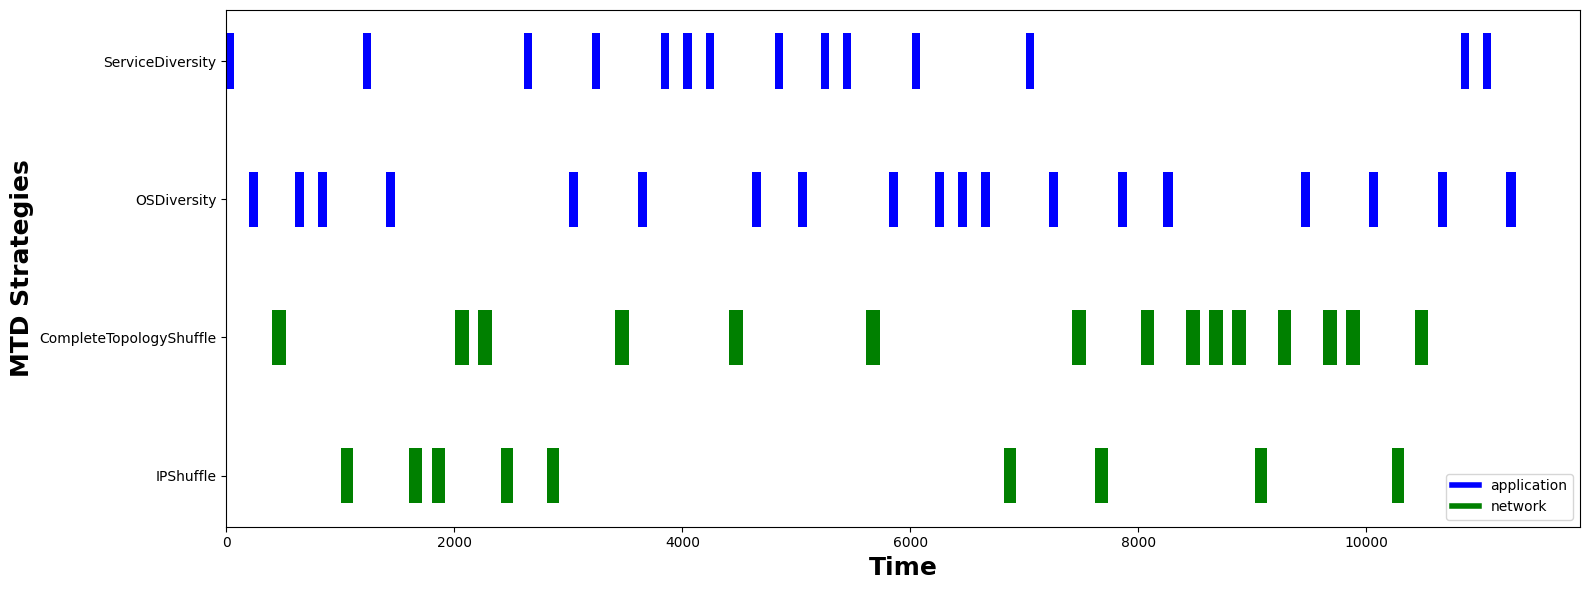

In [ ]:
evaluation.visualise_mtd_operation()

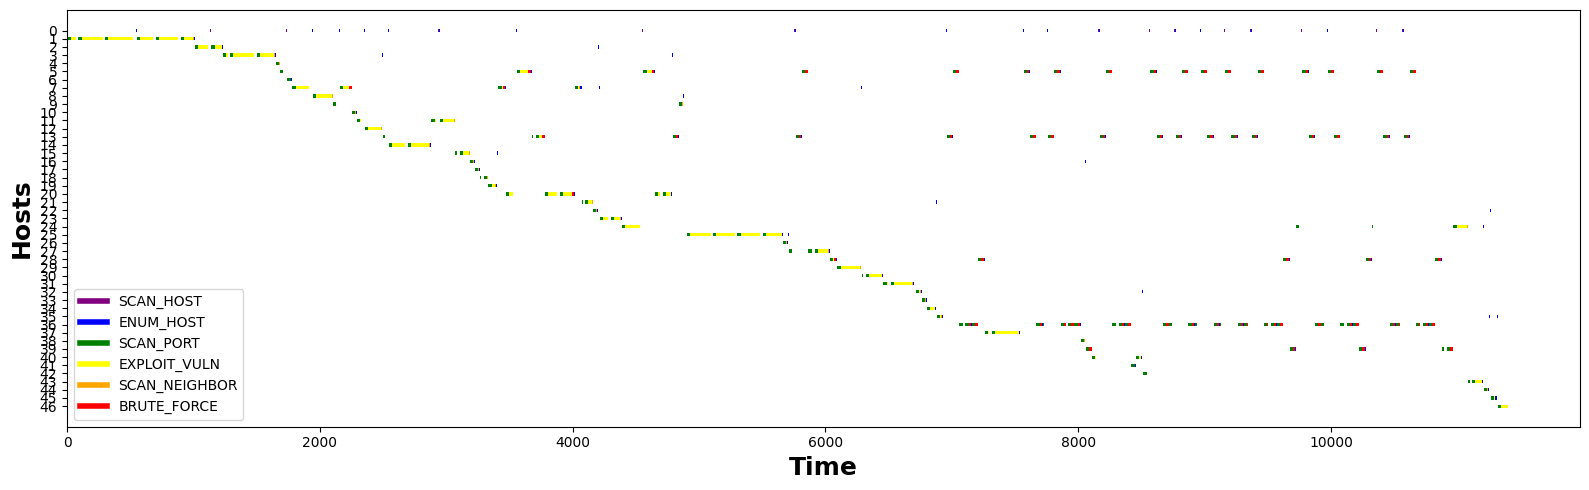

In [ ]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  41


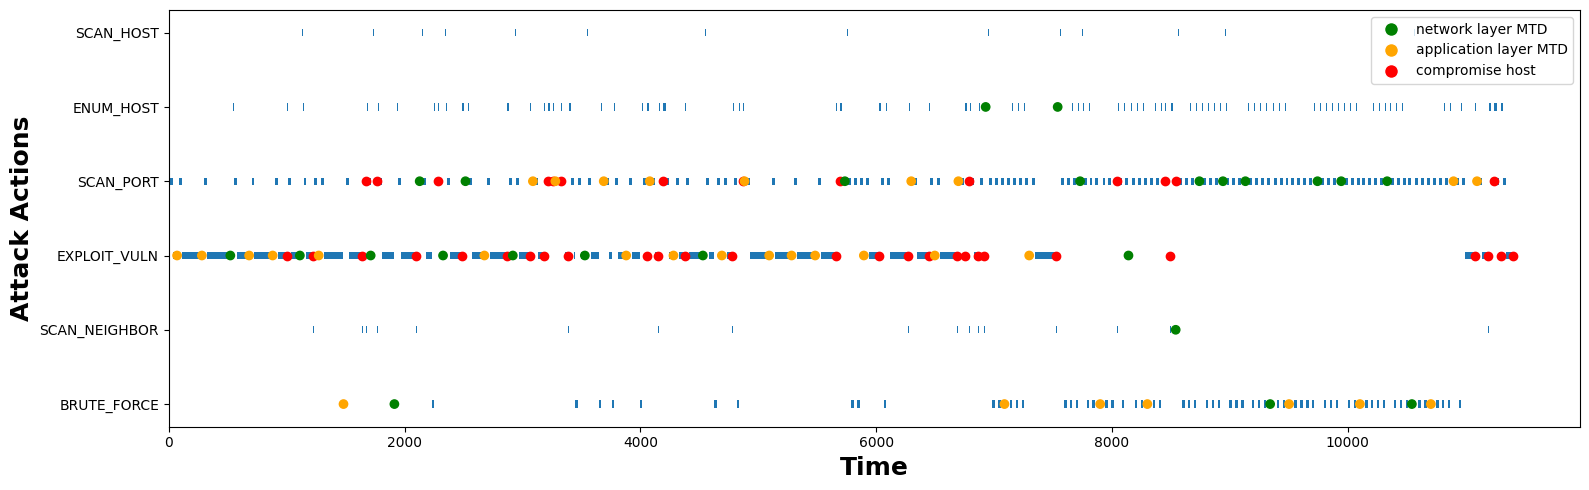

In [ ]:
evaluation.visualise_attack_operation()

In [ ]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
96,EXPLOIT_VULN,977.049701,999.994568,22.944866,0,3d7c9e02-b126-48e3-8b82-2292be159117,0,3d7c9e02-b126-48e3-8b82-2292be159117,2,81,0,"[Ilsa, Natalya, Arlene, Carmine, Nara]",None,None,yellow,1
117,EXPLOIT_VULN,1218.271268,1224.181961,5.910693,17,6dcf815e-8ff5-44d6-afc4-fe05d2db121a,17,6dcf815e-8ff5-44d6-afc4-fe05d2db121a,2,95,1,"[Wylma, Agneta, Kalie, Bettine, Elinore]",None,None,yellow,2
163,EXPLOIT_VULN,1629.259628,1641.205806,11.946178,11,6332f426-8fd3-46a7-a719-234cb9781cc3,11,6332f426-8fd3-46a7-a719-234cb9781cc3,1,134,2,"[Jackquelin, Elisha, Mickie]",None,None,yellow,3
166,SCAN_PORT,1651.205806,1676.205806,25.000000,10,23f86221-b95e-45ea-84db-554e288d9b1e,10,23f86221-b95e-45ea-84db-554e288d9b1e,1,135,3,"[Korie, Aleece, Sybille]",None,None,green,4
173,SCAN_PORT,1743.252681,1768.252681,25.000000,20,ce6fc127-40c2-4e94-8ff7-18d185213442,20,ce6fc127-40c2-4e94-8ff7-18d185213442,1,135,4,[Nicol],None,None,green,6
208,EXPLOIT_VULN,2090.299028,2097.587419,7.288391,12,9269477c-566e-4bce-9024-165c49518f26,12,9269477c-566e-4bce-9024-165c49518f26,1,161,5,"[Jodie, Vera, Cordey, Jennine, Hedy]",None,None,yellow,8
222,SCAN_PORT,2255.717752,2280.717752,25.000000,18,3459ebb0-a089-4792-aa84-b5080223375d,18,3459ebb0-a089-4792-aa84-b5080223375d,1,167,6,"[Letitia, Stacia, Bernetta]",None,None,green,10
244,EXPLOIT_VULN,2481.200785,2485.532891,4.332106,13,1df851ae-44ce-4ed1-9f2f-cb4488cc44c8,13,1df851ae-44ce-4ed1-9f2f-cb4488cc44c8,1,180,7,"[Cheri, Mame, Lindsay, Bee]",None,None,yellow,12
290,EXPLOIT_VULN,2864.379196,2867.479828,3.100632,21,e8e98c1f-6a4f-4b52-8729-8a3a3949bc05,21,e8e98c1f-6a4f-4b52-8729-8a3a3949bc05,1,217,8,[Nicoline],None,None,yellow,14
312,EXPLOIT_VULN,3053.930843,3060.529171,6.598328,19,a70f3c61-4cd7-441d-bb97-5a028d7f92a6,19,a70f3c61-4cd7-441d-bb97-5a028d7f92a6,3,231,9,"[Eada, Sabina, Sibylla]",None,None,yellow,11


In [ ]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
166,SCAN_PORT,1651.205806,1676.205806,25.0,10,23f86221-b95e-45ea-84db-554e288d9b1e,10,23f86221-b95e-45ea-84db-554e288d9b1e,1,135,3,"[Korie, Aleece, Sybille]",None,None,green,4
173,SCAN_PORT,1743.252681,1768.252681,25.0,20,ce6fc127-40c2-4e94-8ff7-18d185213442,20,ce6fc127-40c2-4e94-8ff7-18d185213442,1,135,4,[Nicol],None,None,green,6
222,SCAN_PORT,2255.717752,2280.717752,25.0,18,3459ebb0-a089-4792-aa84-b5080223375d,18,3459ebb0-a089-4792-aa84-b5080223375d,1,167,6,"[Letitia, Stacia, Bernetta]",None,None,green,10
327,SCAN_PORT,3189.638361,3214.638361,25.0,22,2fec2b0c-923a-418e-8ea0-a055135423bf,22,2fec2b0c-923a-418e-8ea0-a055135423bf,1,240,11,[Elita],None,None,green,16
331,SCAN_PORT,3229.638361,3254.638361,25.0,9,281e0a32-9f68-4393-b683-589d50a51e6b,9,281e0a32-9f68-4393-b683-589d50a51e6b,1,240,12,[],None,None,green,17
336,SCAN_PORT,3299.220344,3324.220344,25.0,5,1c6f76b3-d8fd-4011-bde0-2c2d6e1e5fdc,5,1c6f76b3-d8fd-4011-bde0-2c2d6e1e5fdc,1,240,13,[],None,None,green,18
412,SCAN_PORT,4163.549028,4188.549028,25.0,42,d9d0df8e-ca8a-462f-9608-342202f39680,42,d9d0df8e-ca8a-462f-9608-342202f39680,1,279,17,[Gloria],None,None,green,22
477,SCAN_PORT,4841.925568,4866.925568,25.0,35,d10fb8f5-1d1d-4e0b-9489-afe71370553c,35,d10fb8f5-1d1d-4e0b-9489-afe71370553c,2,317,20,[],None,None,green,9
558,SCAN_PORT,5665.273614,5690.273614,25.0,41,83674bc4-80a5-41f6-834a-c55bd8d141fc,41,83674bc4-80a5-41f6-834a-c55bd8d141fc,1,384,22,[],None,None,green,26
676,SCAN_PORT,6766.291619,6791.291619,25.0,45,fef5e53a-83c1-46ed-b091-c4f1e8b87fd3,45,fef5e53a-83c1-46ed-b091-c4f1e8b87fd3,1,459,28,[],None,None,green,33


In [ ]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
96,EXPLOIT_VULN,977.049701,999.994568,22.944866,0,3d7c9e02-b126-48e3-8b82-2292be159117,0,3d7c9e02-b126-48e3-8b82-2292be159117,2,81,0,"[Ilsa, Natalya, Arlene, Carmine, Nara]",None,None,yellow,1
117,EXPLOIT_VULN,1218.271268,1224.181961,5.910693,17,6dcf815e-8ff5-44d6-afc4-fe05d2db121a,17,6dcf815e-8ff5-44d6-afc4-fe05d2db121a,2,95,1,"[Wylma, Agneta, Kalie, Bettine, Elinore]",None,None,yellow,2
163,EXPLOIT_VULN,1629.259628,1641.205806,11.946178,11,6332f426-8fd3-46a7-a719-234cb9781cc3,11,6332f426-8fd3-46a7-a719-234cb9781cc3,1,134,2,"[Jackquelin, Elisha, Mickie]",None,None,yellow,3
208,EXPLOIT_VULN,2090.299028,2097.587419,7.288391,12,9269477c-566e-4bce-9024-165c49518f26,12,9269477c-566e-4bce-9024-165c49518f26,1,161,5,"[Jodie, Vera, Cordey, Jennine, Hedy]",None,None,yellow,8
244,EXPLOIT_VULN,2481.200785,2485.532891,4.332106,13,1df851ae-44ce-4ed1-9f2f-cb4488cc44c8,13,1df851ae-44ce-4ed1-9f2f-cb4488cc44c8,1,180,7,"[Cheri, Mame, Lindsay, Bee]",None,None,yellow,12
290,EXPLOIT_VULN,2864.379196,2867.479828,3.100632,21,e8e98c1f-6a4f-4b52-8729-8a3a3949bc05,21,e8e98c1f-6a4f-4b52-8729-8a3a3949bc05,1,217,8,[Nicoline],None,None,yellow,14
312,EXPLOIT_VULN,3053.930843,3060.529171,6.598328,19,a70f3c61-4cd7-441d-bb97-5a028d7f92a6,19,a70f3c61-4cd7-441d-bb97-5a028d7f92a6,3,231,9,"[Eada, Sabina, Sibylla]",None,None,yellow,11
324,EXPLOIT_VULN,3172.395897,3179.638361,7.242464,7,1415ee3b-f5c5-4be7-abff-e39d30ed5831,7,1415ee3b-f5c5-4be7-abff-e39d30ed5831,1,239,10,"[Sibyl, Suzi]",None,None,yellow,15
342,EXPLOIT_VULN,3381.835537,3388.111289,6.275752,6,97720723-5584-4737-860e-7a17e6737258,6,97720723-5584-4737-860e-7a17e6737258,1,242,14,"[Ralina, Angil, Helen]",None,None,yellow,19
400,EXPLOIT_VULN,4043.569963,4053.225816,9.655853,23,37c6228b-1905-4276-903f-e640e6bba415,23,37c6228b-1905-4276-903f-e640e6bba415,4,275,15,"[Frances, Asia]",None,None,yellow,7


In [ ]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [ ]:
evaluation.evaluation_result_by_compromise_checkpoint()

[{'time_to_compromise': 1787.6169535049844,
  'attack_success_rate': 0.3125,
  'host_compromise_ratio': 0.1,
  'mtd_execution_frequency': 0.005040638308333536},
 {'time_to_compromise': 2638.0157228047647,
  'attack_success_rate': 0.35714285714285715,
  'host_compromise_ratio': 0.2,
  'mtd_execution_frequency': 0.005040638308333536},
 {'time_to_compromise': 3325.5865347483946,
  'attack_success_rate': 0.36585365853658536,
  'host_compromise_ratio': 0.3,
  'mtd_execution_frequency': 0.005040638308333536},
 {'time_to_compromise': 3957.463520249133,
  'attack_success_rate': 0.38461538461538464,
  'host_compromise_ratio': 0.4,
  'mtd_execution_frequency': 0.005040638308333536},
 {'time_to_compromise': 5283.039324266325,
  'attack_success_rate': 0.373134328358209,
  'host_compromise_ratio': 0.5,
  'mtd_execution_frequency': 0.005040638308333536},
 {'time_to_compromise': 5649.310826172785,
  'attack_success_rate': 0.40540540540540543,
  'host_compromise_ratio': 0.6,
  'mtd_execution_frequency